<a href="https://colab.research.google.com/github/IraanC/consume_apiJupter/blob/main/consumeAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests as rqs;
import json as jsn;


Extração dos dados Pela API


In [165]:
url = "http://makeup-api.herokuapp.com/api/v1/products.json";

data = []

response = rqs.get(url);
response_json = response.json();

for item in range(len(response_json)):
  item = response_json[item];
  filte = {'name': item['name'],
            'category': item['category'],
            'price': item['price'],
            'product_type': item['product_type'],
            'description': item['description'],
            }
  data.append(filte)



Tratamento dos dados


In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;

In [ ]:
df = pd.DataFrame(data);
# '''
#  Durante a analise esploratória dos dados percebi que o valor das mascaras estava incorreto
#  então fiz a correção os definindo como 50 reais.
# ''''
df['price'] = df['price'].replace(0.0, np.nan)
df =  df.dropna()
df.loc[df['product_type'] == 'mascara', 'price'] = 50

df.head()

,name,category,price,product_type,description
23,Perfect Lash Mascara,,50,mascara,Marie Natie Perfect Lash Mascara is made with ...
30,Mascara,,50,mascara,"All natural mascara lengthens, thickens, and d..."
37,Volumising Mascara,,50,mascara,Natural mineral pigments for intense natural b...
40,Muse Mascara,,50,mascara,"Define, lengthen and nourish lashes with organ..."


In [ ]:
df.groupby(['category']).size()

,0
category,
,10
bb_cc,7
concealer,18
contour,3
cream,33
gel,3
highlighter,2
lip_gloss,26
lip_stain,4


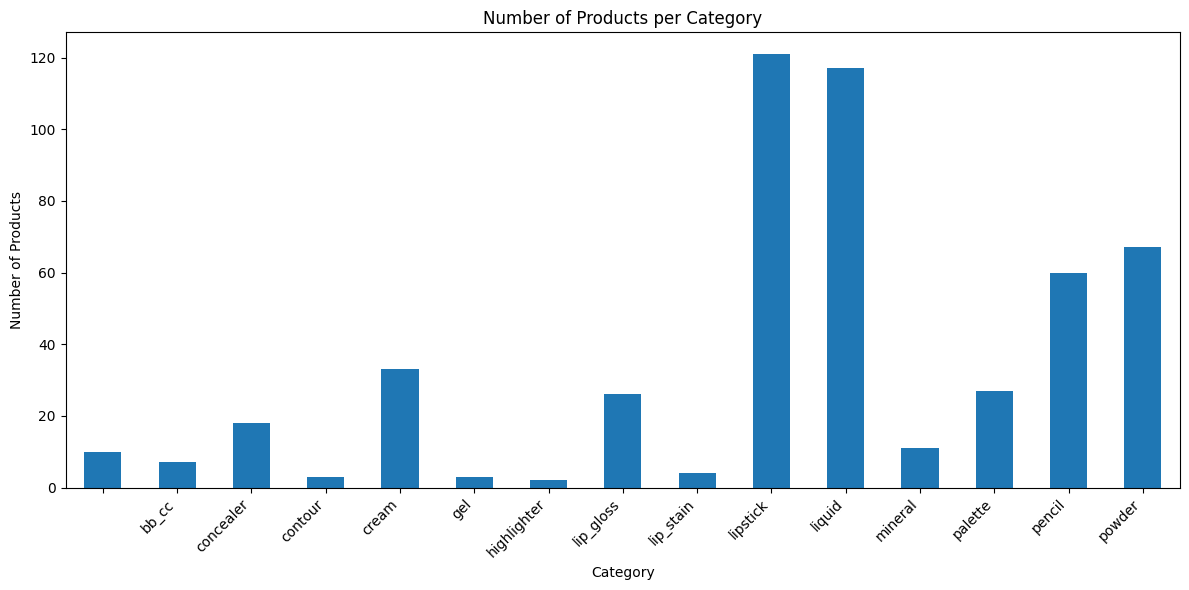

In [ ]:


elements = df.groupby(['category']).size()

plt.figure(figsize=(12, 6))  # Adjust figure size here
elements.plot(kind='bar')
plt.title('Number of Products per Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
import altair as alt;

alt.Chart(df).mark_point().encode(
    x= 'category',
    y='price'
).properties(
    title='Price per Category',
    width=1012,
    height=1500,
    background='#F5F5F5'

)

In [ ]:
df.groupby(['product_type']).size()

alt.Chart(df).mark_point().encode(
    x= 'product_type',
    y='price'
).properties(
    title='Price per Product Type',
    width=1012,
    height=1500,
    background='#F5F5F5'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: Futu

alt.Chart(...)